In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Data Analysis on the parameters impacting student education

In [9]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [11]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [16]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
# if you want to replace any wrong entry:
#df['WklyStudyHours']=df["WklyStudyHours"].str.replace("05-oct","5-10")
#df.head()

# Analysis based on gender distribution

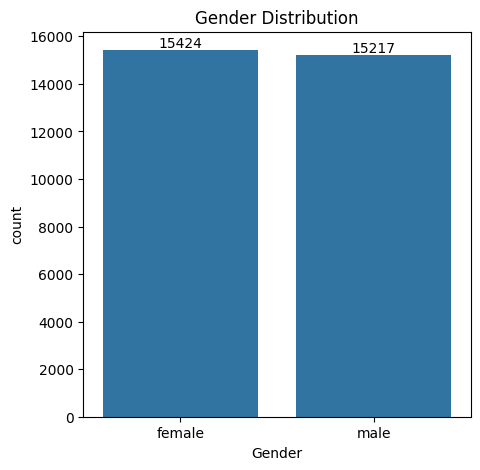

In [28]:
# Using count plot:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()  # It will remove the extra text


In [29]:
# 1.So, form the above chat we got to know that no. of females are more than the no. of males

# Analysis based on parent education 

In [34]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


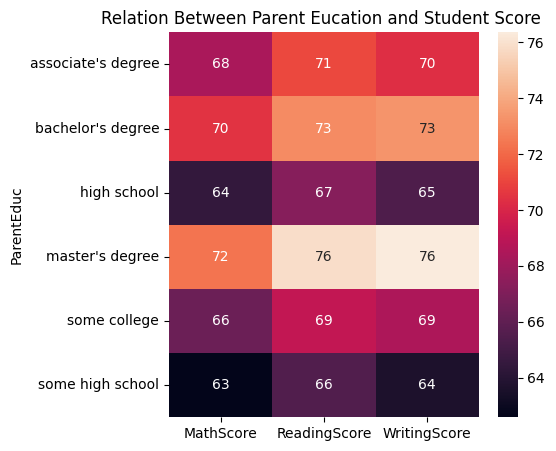

In [38]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Relation Between Parent Eucation and Student Score ")
plt.show()

In [39]:
# 2. So, form this chat we can say that higher education of parents have a good impact in their child's score

#  Analysis based on parent's marital Status

In [40]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


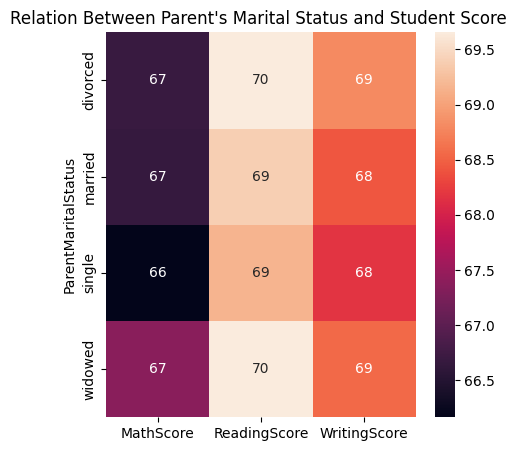

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relation Between Parent's Marital Status and Student Score ")
plt.show()

In [42]:
# 3. So, form the above chat we can conclude that there is negligible impact on the student score due to their parents marital status

#  Analysis based on student's weekly study hours

In [59]:
gb2 = df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


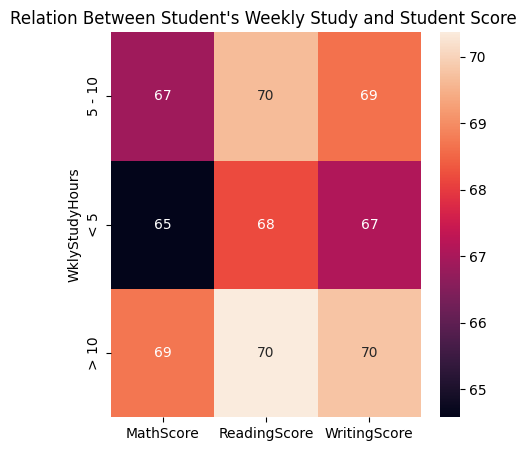

In [86]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot=True)
plt.title("Relation Between Student's Weekly Study and Student Score ")
plt.show()

In [70]:
# 4. So, form the above chat we can conclude that there is some impact on the student score based on their weekly study hours

# Analysis based on students who practice sports

In [61]:
gb3 = df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


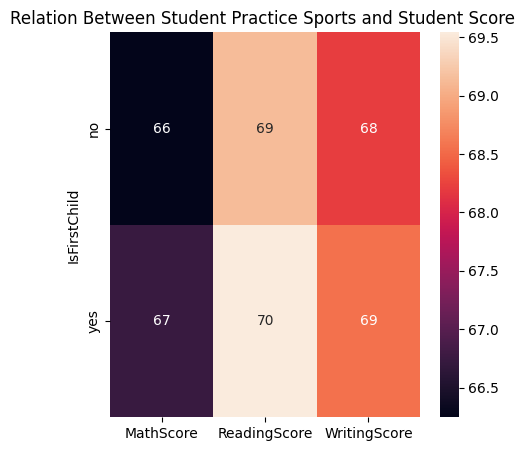

In [87]:
plt.figure(figsize=(5,5))
sns.heatmap(gb3,annot=True)
plt.title("Relation Between Student Practice Sports and Student Score ")
plt.show()

In [63]:
# 5.So, form the above chat we got to know that practicing in sports is also have a good impact on student's score

# Analysis based on student who are first child

In [66]:
gb4 = df.groupby("IsFirstChild").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


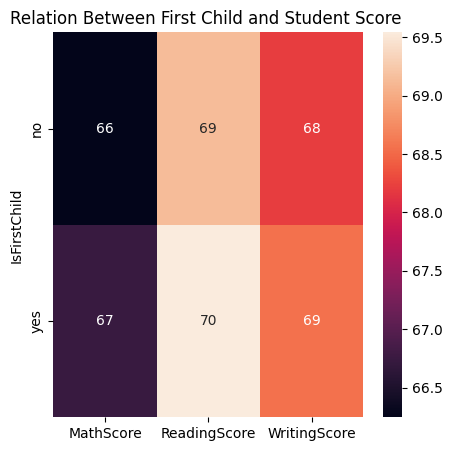

In [88]:
plt.figure(figsize=(5,5))
sns.heatmap(gb4,annot=True)
plt.title("Relation Between First Child and Student Score ")
plt.show()

In [ ]:
# 6.So, form the above chat we got to know that if student is first child then, it has a very little impact on student's score

# Analysis based on No. of siblings

In [68]:
gb5 = df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb5)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


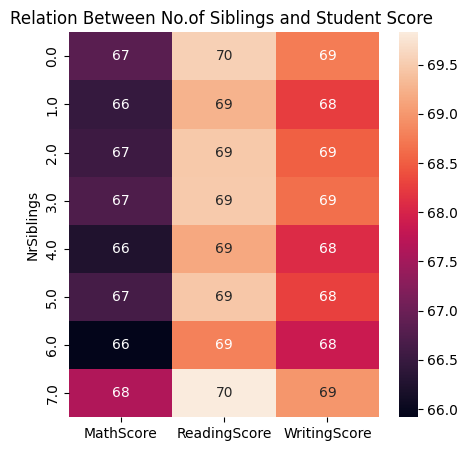

In [89]:
plt.figure(figsize=(5,5))
sns.heatmap(gb5,annot=True)
plt.title("Relation Between No.of Siblings and Student Score ")
plt.show()

In [71]:
# 7. So, form the above chat we can conclude that there is negligible impact on the student score due to siblings

# Analysis based on Lunch Type

In [75]:
gb6 = df.groupby("LunchType").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb6)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


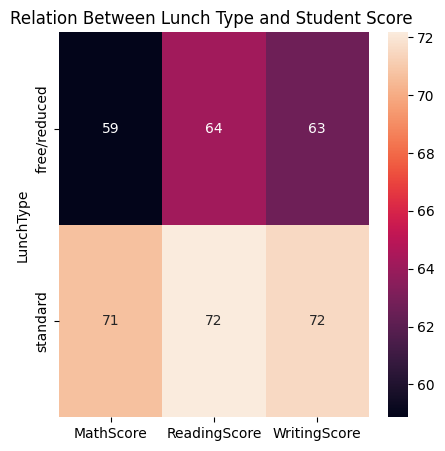

In [90]:
plt.figure(figsize=(5,5))
sns.heatmap(gb6,annot=True)
plt.title("Relation Between Lunch Type and Student Score ")
plt.show()

In [77]:
# 8.So, form the above chat we got to know that Standard Lunch has a great impact on student's score

# Analysis based on student Transport Means

In [78]:
gb7 = df.groupby("TransportMeans").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb7)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


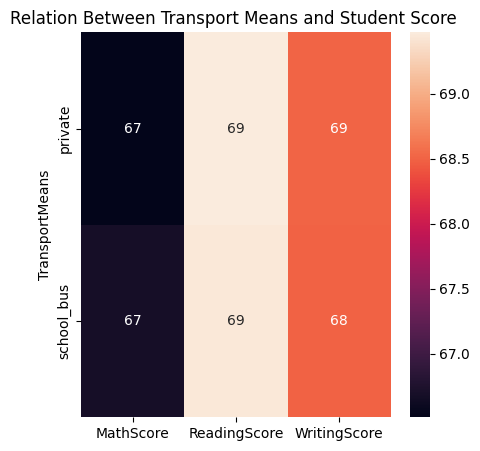

In [91]:
plt.figure(figsize=(5,5))
sns.heatmap(gb7,annot=True)
plt.title("Relation Between Transport Means and Student Score ")
plt.show()

In [81]:
# 9. So, form the above chat we can conclude that there is negligible impact on the student score based on Transport Means

# Checking Outliers

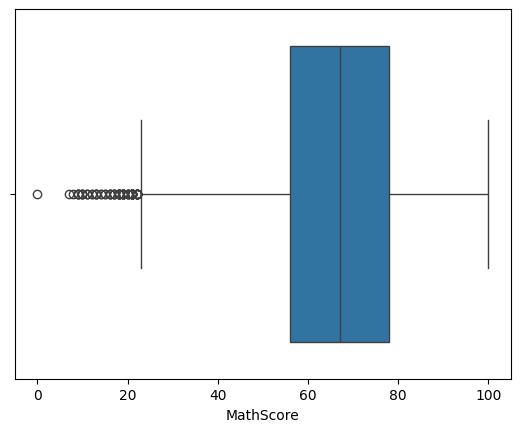

In [45]:
sns.boxplot(data =df,x="MathScore")
plt.show()

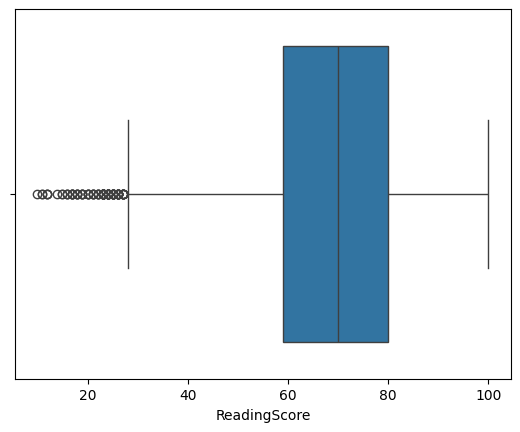

In [46]:
sns.boxplot(data =df,x="ReadingScore")
plt.show()

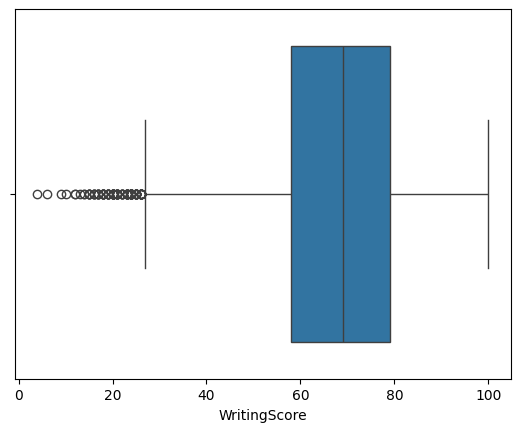

In [47]:
sns.boxplot(data =df,x="WritingScore")
plt.show()

In [48]:
# 10. So, form the above 3 chats we can observe that students are weak in maths as compared to reading and writing

#  Analysis of ethenic goup

In [49]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


#  Distribution of Ethenic Groups

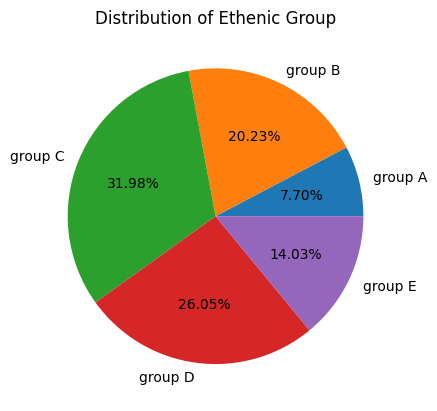

In [56]:
groupA= df.loc[(df["EthnicGroup"]=='group A')].count()
groupB= df.loc[(df["EthnicGroup"]=='group B')].count()
groupC= df.loc[(df["EthnicGroup"]=='group C')].count()
groupD= df.loc[(df["EthnicGroup"]=='group D')].count()
groupE= df.loc[(df["EthnicGroup"]=='group E')].count()

l=["group A", "group B", "group C", "group D", "group E"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethenic Group")
plt.show()

In [92]:
'''Finally from the above 10 observations we can give some implications like:
 1.Gender is not be a significant factor impacting scores directly.
 2.Encouraging and supporting parents in pursuing higher education can contribute to improved student performance.
 3.Marital status is not a significant factor influencing academic performance.
 4.Encouraging students to allocate dedicated time for studying can positively affect their academic achievements.
 5.Encouraging students to engage in sports activities can contribute to overall student well-being and potentially boost academic performance.
 6.Birth order is not a significant factor influencing academic success.
 7.The number of siblings did not play a major role in academic performance.
 8.Providing nutritious and standardized meals at school can positively influence academic outcomes.
 9.The mode of transportation is not a significant factor affecting academic success.
 10.Special attention and additional resources can be beneficial in improving math skills.
 
 So, final conclution can be like:
 While there are various factors influencing student performance, addressing key areas such as promoting parental education 
 involvement, encouraging regular study habits, fostering sports participation, and ensuring nutritious meals may contribute 
 to an overall improvement in student exam scores. 
 It's important to consider a holistic approach to education that addresses both academic and non-academic factors. 
 Regular monitoring and support mechanisms can be implemented to track progress and provide assistance where needed.

'''

'Finally from the above 10 observations we can give some implications like: '